In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse.linalg as splinalg
import scipy.sparse as sps

import jlinops

In [2]:
M = 40
F = jlinops.Gaussian1DBlurOperator(M, blur_sigma = 4.0, mode="wrap")
np.random.seed(0)
mask = np.random.choice([0, 1], size=M)
P = jlinops.Subsampling1DOperator(mask)
A = P @ F

In [10]:
Ak, (_, s, _) = jlinops.fixed_rank_tsvd(A, k=15, flip=True)

In [11]:
Akmat = jlinops.black_box_to_dense(Ak)
Amat = jlinops.black_box_to_dense(A)

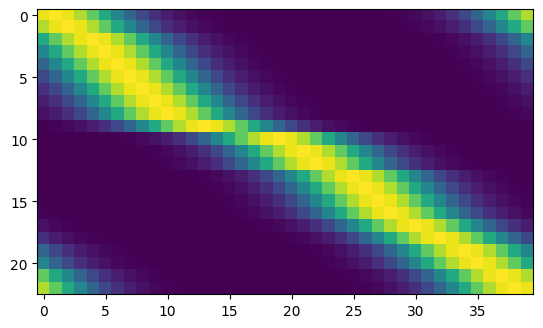

In [12]:
plt.imshow(Akmat)
plt.show()

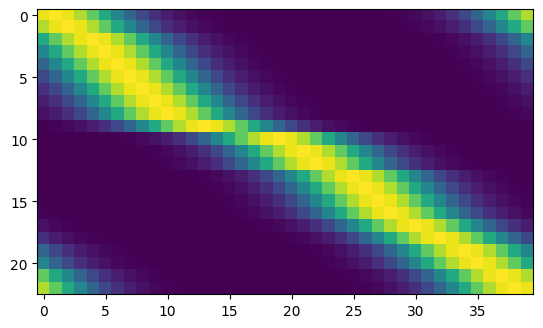

In [13]:
plt.imshow(Amat)
plt.show()

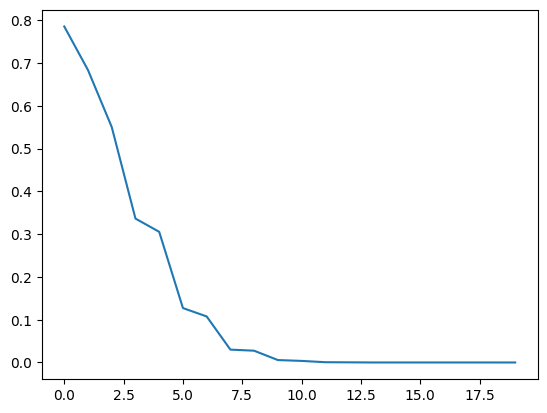

In [9]:
plt.plot(s)
plt.show()

# SVD?

In [39]:
S1, V1 = jlinops.eigsh(A.T @ A, all=True, flip=True)
S2, V2 = jlinops.eigsh(A @ A.T, all=True, flip=True)

In [40]:
m, n = A.shape

In [41]:
if m > n:
    squared_svals = S1
elif m < n:
    squared_svals = S2
else:
    squared_svals = S1

svals = np.sqrt(squared_svals)

In [42]:
A

<23x40 _ProductLinearOperator with dtype=float64>

In [43]:
svals

array([0.93991971, 0.86858931, 0.79219637, 0.77894524, 0.73378122,
       0.7070821 , 0.67732648, 0.62123577, 0.55981046, 0.53363744,
       0.52404057, 0.50755691, 0.40740565, 0.36109948, 0.27338051,
       0.24688599, 0.23596833, 0.21269871, 0.17432901, 0.15828809,
       0.08662538, 0.07789781, 0.03416548])

In [44]:
U = V2
S = svals
Vt = V1

In [45]:
X = np.zeros((m,n))

In [46]:
np.fill_diagonal(X, svals)

In [47]:
X

array([[0.93991971, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.86858931, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0. 

In [48]:
def iterative_svd(A):
    """Builds the SVD of an input LinearOperator using iterative methods.
    Here A = U S Vt, where D(svals) puts the singular values in a matrix of appropriate size.
    """
    
    # Compute eigendecompositions
    S1, V = jlinops.eigsh(A.T @ A, all=True, flip=True)
    S2, U = jlinops.eigsh(A @ A.T, all=True, flip=True)

    # Handle singular values
    if m > n:
        squared_svals = S1
    elif m < n:
        squared_svals = S2
    else:
        squared_svals = S1

    svals = np.sqrt(squared_svals)

    # Build S
    S = np.zeros(A.shape)
    np.fill_diagonal(S, svals)
    
    
    return U, S, V.T, svals

    

In [49]:
U, S, Vt, svals = iterative_svd(A)

In [64]:
mat = U @ S @ Vt
X = jlinops.MatrixLinearOperator(mat)
jlinops.duck_test(A, X)

False

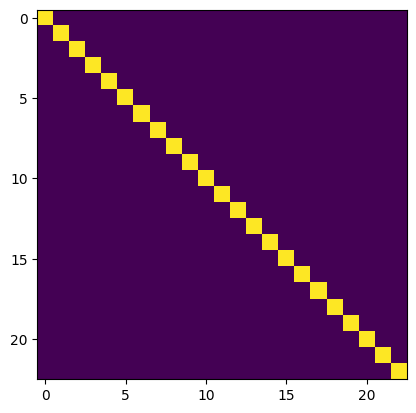

In [50]:
plt.imshow(U.T @ U)
plt.show()

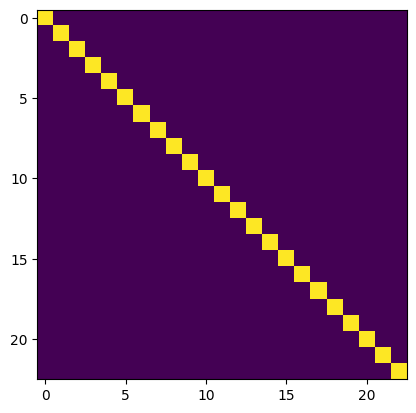

In [51]:
plt.imshow(U @ U.T)
plt.show()

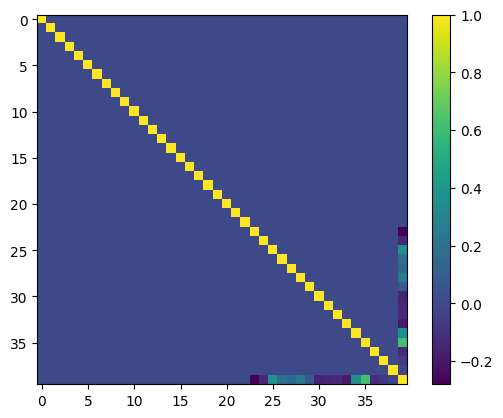

In [53]:
plt.imshow(Vt @ Vt.T)
plt.colorbar()
plt.show()

In [58]:
U.shape

(23, 23)

In [59]:
(A @ A.T).shape

(23, 23)

In [60]:
U.shape

(23, 23)

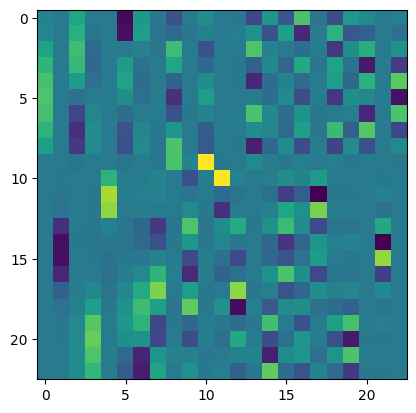

In [61]:
plt.imshow(U)
plt.show()

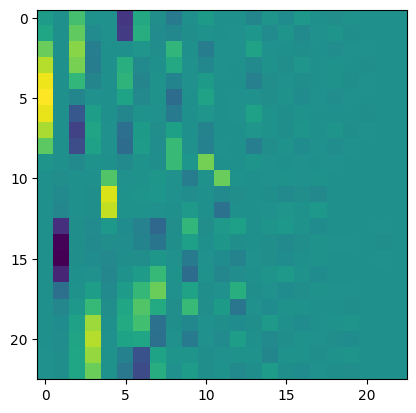

In [62]:
plt.imshow((A @ A.T) @ U )
plt.show()

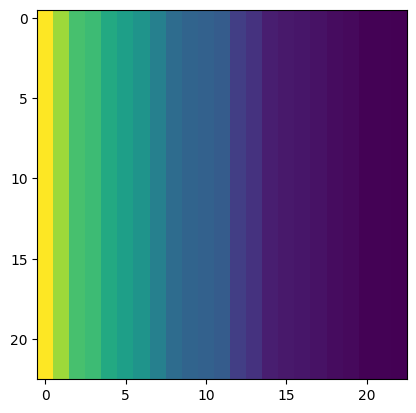

In [63]:
plt.imshow( ((A @ A.T) @ U) / (U) )
plt.show()

In [26]:
 ( ((A @ A.T) @ U) / (U) )[0,:]

array([7.41373035e-01, 6.07190776e-01, 5.01131668e-01, 3.75983061e-01,
       3.38173327e-01, 2.26031142e-01, 1.67590904e-01, 1.02423316e-01,
       8.23234595e-02, 4.96111818e-02, 2.60567097e-02, 1.65230464e-02,
       5.56292518e-03, 2.37433994e-03, 1.11654654e-03, 4.74460114e-04,
       1.79656274e-04, 5.96097874e-05, 1.98841256e-05, 4.22490759e-06,
       6.44289070e-07, 2.70573613e-07, 6.63828384e-09])

In [28]:
svals**2

array([7.41373035e-01, 6.07190776e-01, 5.01131668e-01, 3.75983061e-01,
       3.38173327e-01, 2.26031142e-01, 1.67590904e-01, 1.02423316e-01,
       8.23234595e-02, 4.96111818e-02, 2.60567097e-02, 1.65230464e-02,
       5.56292518e-03, 2.37433994e-03, 1.11654654e-03, 4.74460114e-04,
       1.79656274e-04, 5.96097874e-05, 1.98841256e-05, 4.22490759e-06,
       6.44289070e-07, 2.70573613e-07, 6.63828295e-09])

In [29]:
 ( ((A @ A.T) @ U) / (U) )[0,:]  - svals**2

array([ 4.44089210e-16, -7.77156117e-16,  2.22044605e-16,  3.88578059e-16,
        5.55111512e-16,  3.88578059e-16,  2.77555756e-17, -1.94289029e-16,
        8.32667268e-17, -4.16333634e-17, -7.63278329e-17,  8.32667268e-17,
       -3.21791205e-16, -1.68268177e-16,  2.10118381e-16, -1.40404181e-17,
        5.57550967e-17, -3.96872205e-16,  6.76745444e-17,  1.24476574e-16,
        2.39899530e-16, -8.11752966e-17,  8.95721940e-16])

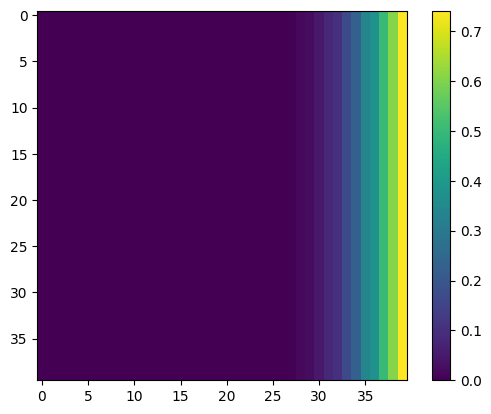

In [35]:
plt.imshow(( ((A.T @ A) @ V) / (V) ))
plt.colorbar()
plt.show()